What is the GLORYS grid like?

The GLORYS grid appears to be ORCA 025 but lest check

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import scipy.interpolate as interp

%matplotlib inline

# Grid angle

Find the angle between X grid lines and East

In [2]:
def grid_angle(lons, lats):
    """ Assumes lons, lats are shape (y,x) in degrees
        Find the angle between longitude grid lines and East.
            θ = atan2(sin(Δlong).cos(lat2),
                  cos(lat1).sin(lat2) − sin(lat1).cos(lat2).cos(Δlong))
    """
    dlons = np.radians(lons[:,1:] - lons[:, 0:-1])
    lat1 = np.radians(lats[:, 0:-1])
    lat2 = np.radians(lats[:, 1:])
    
    theta=np.empty_like(lons)
    x = np.sin(dlons)*np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1)* np.cos(lat2) * np.cos(dlons))
    
    # Extend theta by copying last column (How do we treat the boundary point?)
    theta[:, 0:-1] = np.arctan2(x,y)
    theta[:,-1] = theta[:,-2]
    # Theta is the angle with North so subtact from pi/2 for angle with East
    return np.rad2deg(np.pi/2 - theta)

Check with Susan's grid. Answer should be about 29 degrees

In [3]:
fname = '/data/hdd/salishsea/grid/bathymetry_201702.nc'
f = nc.Dataset(fname)

lon = f.variables['nav_lon']
lat = f.variables['nav_lat']

theta = grid_angle(lon, lat)

In [4]:
print(theta, theta.min(), theta.max())

(array([[ 27.35059139,  27.35141042,  27.35222953, ...,  27.34161722,
         27.34244556,  27.34244556],
       [ 29.69382212,  28.69889927,  28.21956712, ...,  27.34342398,
         27.34425247,  27.34425247],
       [ 30.47954156,  29.48475463,  28.91223157, ...,  27.3933096 ,
         27.34605973,  27.34605973],
       ..., 
       [ 29.71373019,  29.57758454,  29.44105299, ...,  28.78902816,
         28.71444947,  28.71444947],
       [ 29.67441756,  29.57186637,  29.39009521, ...,  28.69758813,
         28.77799967,  28.77799967],
       [ 29.64793259,  29.46790378,  29.33950988, ...,  28.73931774,
         28.72585503,  28.72585503]]), -11.285471695631522, 97.708242588719415)


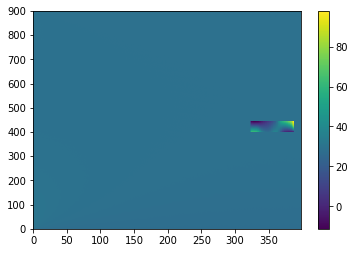

In [5]:
plt.pcolormesh(theta)
plt.colorbar()

Approximately 29 degrees everywhere except in the Fraser river which was mapped to better for the shape of the river channel.

## Test on GLORYS

In [6]:
model='GLORYS'
fname = '/data/hdd/glorys/monthly/GLORYS2V3_ORCA025_20141215_R20151218_gridUV.nc'
f = nc.Dataset(fname)

lon_u = f.variables['nav_lon_u'][:]
lat_u = f.variables['nav_lat_u'][:]
lon_v = f.variables['nav_lon_v'][:]
lat_v = f.variables['nav_lat_v'][:]

u = f.variables['vozocrtx'][:]
v = f.variables['vomecrty'][:]

In [7]:
print(lon_u == lon_v)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [ True False False ..., False False False]
 [False False False ..., False False False]]


### GLORYS is on staggered grid
* Will need to think about how to handle staggered grids...

In [8]:
theta = grid_angle(lon_u, lat_u)
print(theta, theta.min(), theta.max())

(array([[ -1.21871062e-01,  -1.21871062e-01,  -1.21871062e-01, ...,
         -1.21871062e-01,  -1.21871062e-01,  -1.21871062e-01],
       [ -1.22219399e-01,  -1.22219399e-01,  -1.22219399e-01, ...,
         -1.22219399e-01,  -1.22219399e-01,  -1.22219399e-01],
       [ -1.21700302e-01,  -1.21700302e-01,  -1.21700302e-01, ...,
         -1.21700302e-01,  -1.21700302e-01,  -1.21700302e-01],
       ..., 
       [  7.95550766e+01,   8.45961380e+01,   8.74142761e+01, ...,
         -8.45920868e+01,  -7.95528946e+01,  -7.95528946e+01],
       [  9.00000000e+01,   9.00000000e+01,   9.00000000e+01, ...,
         -9.00000000e+01,  -9.00000000e+01,  -9.00000000e+01],
       [  1.00444923e+02,   9.54038620e+01,   9.25857239e+01, ...,
          2.64592102e+02,   2.59552887e+02,   2.59552887e+02]], dtype=float32), -90.0, 269.99069)


In [9]:
theta_v = grid_angle(lon_v, lat_v)
print(theta_v, theta_v.min(), theta_v.max())

(array([[ -1.21611513e-01,  -1.21611513e-01,  -1.21611513e-01, ...,
         -1.21611513e-01,  -1.21611513e-01,  -1.21611513e-01],
       [ -1.21959850e-01,  -1.21959850e-01,  -1.21959850e-01, ...,
         -1.21959850e-01,  -1.21959850e-01,  -1.21959850e-01],
       [ -1.22301362e-01,  -1.22301362e-01,  -1.22301362e-01, ...,
         -1.22301362e-01,  -1.22301362e-01,  -1.22301362e-01],
       ..., 
       [  1.91799728e+02,   8.50055695e+01,   8.83486557e+01, ...,
         -8.83470230e+01,  -8.50034256e+01,  -8.50034256e+01],
       [ -1.17997313e+01,   9.49944229e+01,   9.16513367e+01, ...,
          2.68347015e+02,   2.65003418e+02,   2.65003418e+02],
       [  1.67769394e+02,   1.02284035e+02,   9.47453537e+01, ...,
          2.65250000e+02,   2.57709656e+02,   2.57709656e+02]], dtype=float32), -90.0, 269.85144)


/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b

Text(0.5,1,u'Angle of rotation from X-grid lines to East in GLORYS')

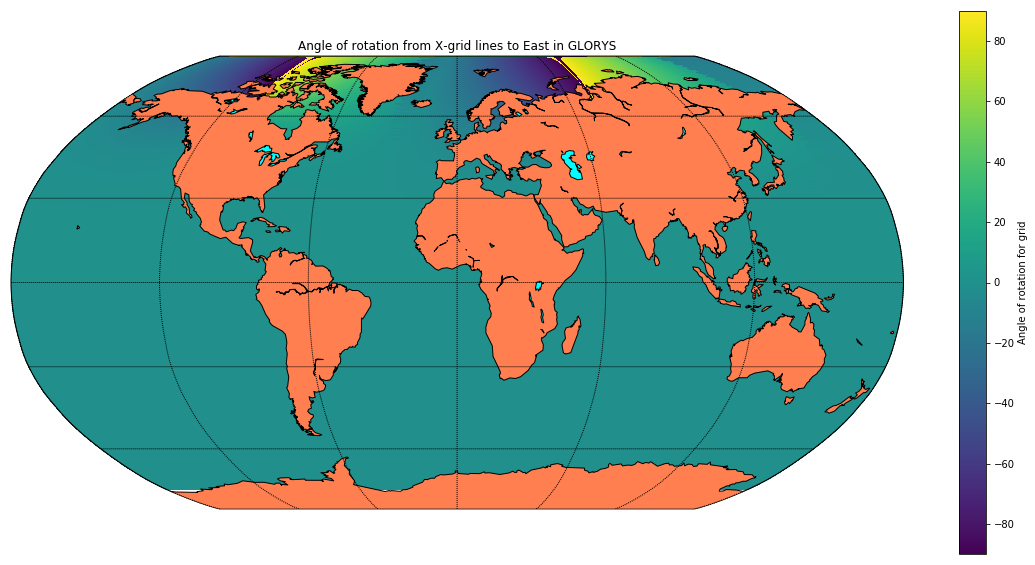

In [10]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
bmap = Basemap(projection='robin',lon_0=0,resolution='c')
bmap.drawcoastlines()
bmap.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
bmap.drawparallels(np.arange(-90.,120.,30.))
bmap.drawmeridians(np.arange(0.,360.,60.))
x,y=bmap(lon_u,lat_v)
mesh=bmap.pcolormesh(x,y,theta,vmin=-90,vmax=90)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Angle of rotation for grid')
ax.set_title('Angle of rotation from X-grid lines to East in {}'.format(model))

Text(0.5,1,u'Angle of rotation from X-grid lines to East in GLORYS')

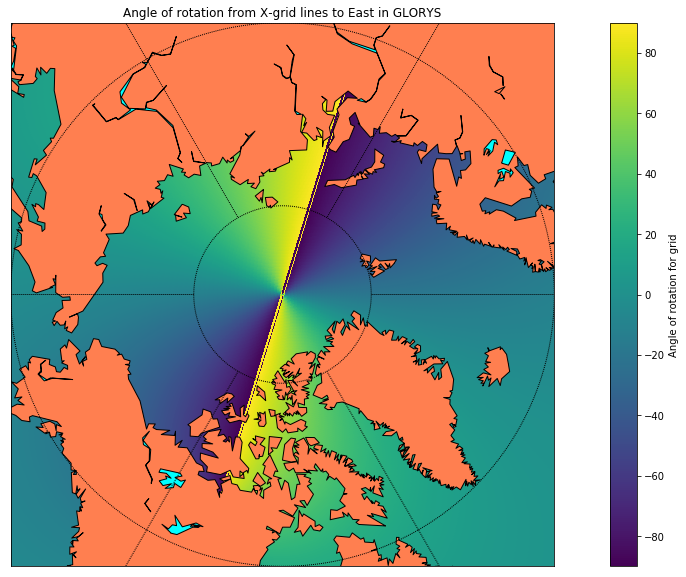

In [11]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
bmap = Basemap(projection='npstere',boundinglat=60,lon_0=-90,resolution='c')
bmap.drawcoastlines()
bmap.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
bmap.drawparallels(np.arange(-90.,120.,30.))
bmap.drawmeridians(np.arange(0.,360.,60.))
x,y=bmap(lon_u,lat_v)
mesh=bmap.pcolormesh(x,y,theta,vmin=-90,vmax=90)
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Angle of rotation for grid')
ax.set_title('Angle of rotation from X-grid lines to East in {}'.format(model))

## Rotating velocities

In [12]:
def rotate_velocity(xv, yv, theta):
    """Rotate velocity vector (xv, yv) to new coordinate system.
    theta is the counterclockise angle measured from the x-axis of new coordinate system 
    and the x-axis of the (xv, yv) coordinate system
    If theta represents the angle between x grid lines and East than the result 
    is zonal (U) and meridional (V) velocities
    returns U,V - velocity along x and y axis in new coordinate system"""
    theta_rad = np.radians(theta)
    U = xv*np.cos(theta_rad) - yv*np.sin(theta_rad)
    V = xv*np.sin(theta_rad) + yv*np.cos(theta_rad)
    return U, V

In [13]:
X_velocity = f.variables['vozocrtx'][0,0,:,:]
Y_velocity = f.variables['vomecrty'][0,0,:,:]

U, V = rotate_velocity(X_velocity, Y_velocity, theta)

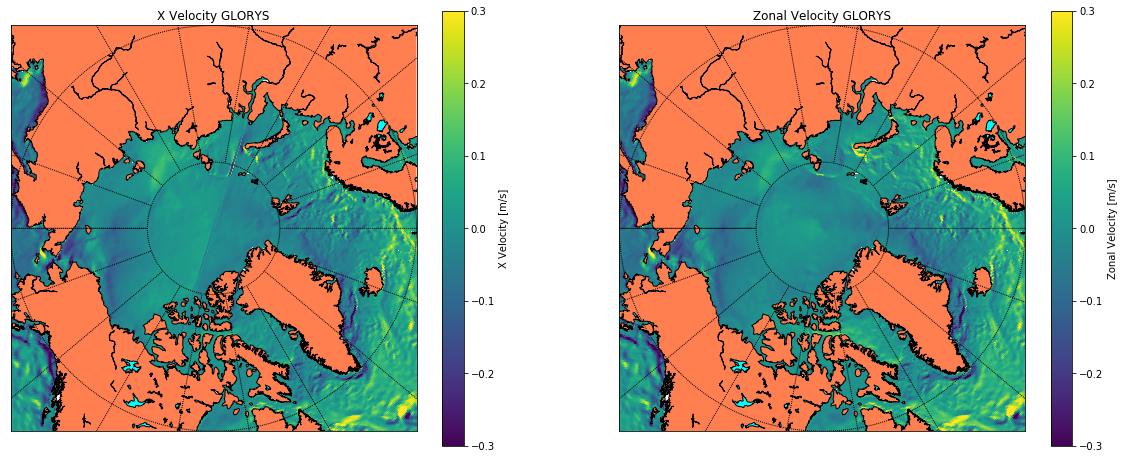

In [14]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
for ax, vel, label in zip(axs, [X_velocity, U], ['X Velocity', 'Zonal Velocity']):
    bmap = Basemap(projection='npstere',boundinglat=60,lon_0=270,resolution='l', ax=ax)
    bmap.drawcoastlines()
    bmap.fillcontinents(color='coral',lake_color='aqua')
    bmap.drawparallels(np.arange(-80.,81.,20.))
    bmap.drawmeridians(np.arange(-180.,181.,20.))
    x,y=bmap(lon_u, lat_v)
    mesh=bmap.pcolormesh(x,y,vel,vmin=-.3, vmax=.3)
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} [m/s]'.format(label))
    ax.set_title('{} {}'.format(label, model))

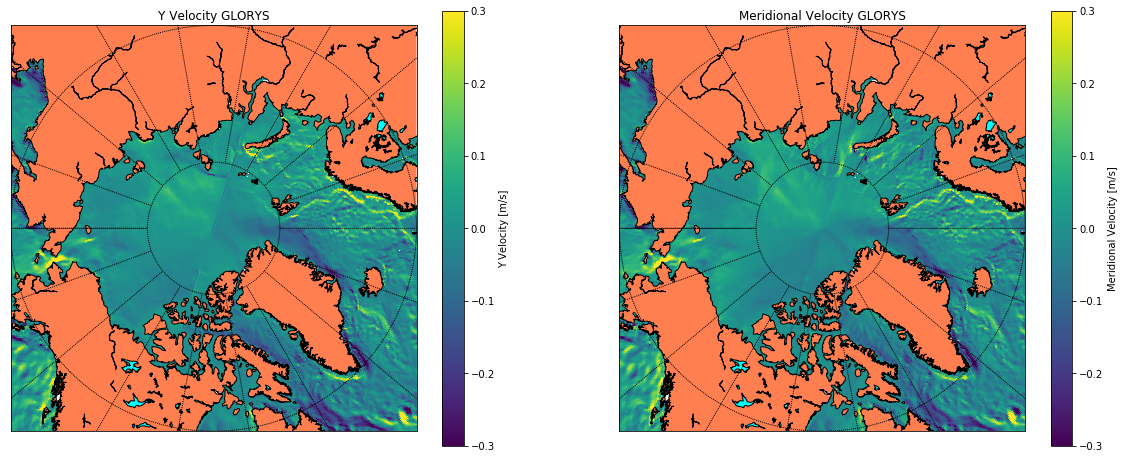

In [15]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
for ax, vel, label in zip(axs, [Y_velocity, V], ['Y Velocity', 'Meridional Velocity']):
    bmap = Basemap(projection='npstere',boundinglat=60,lon_0=270,resolution='l', ax=ax)
    bmap.drawcoastlines()
    bmap.fillcontinents(color='coral',lake_color='aqua')
    bmap.drawparallels(np.arange(-80.,81.,20.))
    bmap.drawmeridians(np.arange(-180.,181.,20.))
    x,y=bmap(lon_u, lat_u)
    mesh=bmap.pcolormesh(x,y,vel,vmin=-.3, vmax=.3)
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} [m/s]'.format(label))
    ax.set_title('{} {}'.format(label,model))

## Quivers
* Not sure we should trust quivers

/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/envs/ocn_nav/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


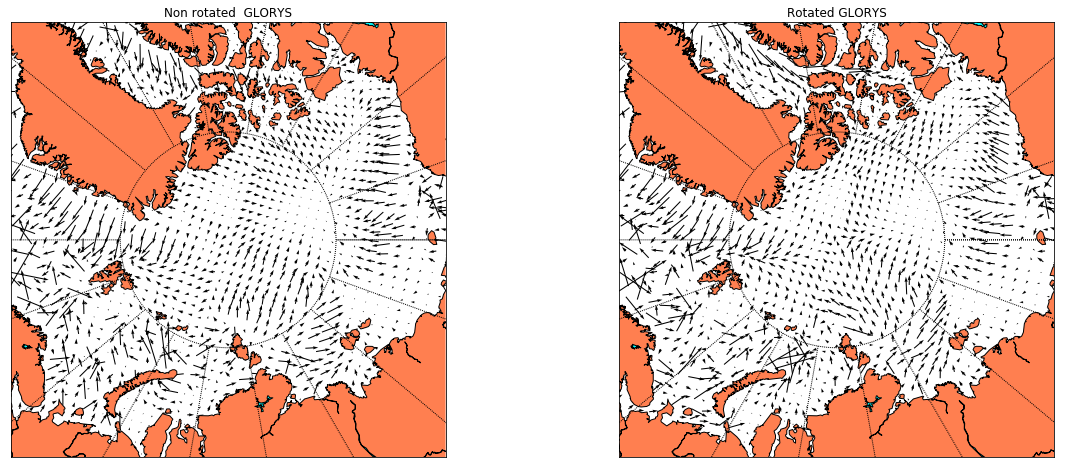

In [16]:
st=8
fig,axs=plt.subplots(1,2,figsize=(20,8))
for ax, xvel, yvel, label in zip(axs, [X_velocity, U],[Y_velocity, V], ['Non rotated ', 'Rotated']):
    bmap = Basemap(projection='npstere',boundinglat=70,lon_0=90,resolution='l', ax=ax)
    bmap.drawcoastlines()
    bmap.fillcontinents(color='coral',lake_color='aqua')
    bmap.drawparallels(np.arange(-80.,81.,20.))
    bmap.drawmeridians(np.arange(-180.,181.,20.))
    #mag = np.sqrt(xvel**2+yvel**2)
    #mesh=bmap.pcolormesh(lon,lat,mag,latlon=True,vmin=0,vmax=.5)
    bmap.quiver(lon_u[::st,::st],lat_u[::st,::st],xvel[::st,::st],yvel[::st,::st],latlon=True,scale=3)
    #cbar=plt.colorbar(mesh, ax=ax)
    #cbar.set_label('{} [m/s]'.format(label))
    ax.set_title('{} {}'.format(label, model))